# Plotting and Data Visualization

There is a range of libraries that can be useful for visualization of data in the Python ecosystem. Probably, **matplotib** is the most popular having a very large base of users. Matplotlib was initially created to offer an open-source, as close as possible alternative of Matlab. However, since its introduction it evolved on its own as a flexible and powerful object oriented graphics library, with a wide range of back-ends. A back-end is a graphics format that can be used to generate the visuals for various mediums, that can be the screen, a web page or a printed paper page.

Numpy arrays are the basic data element for matplotlib. The graphics elements are defined as objects that have customizable attributes.

## Basic 2D scatter and line plot

Text(0, 0.5, 'sinc(x)')

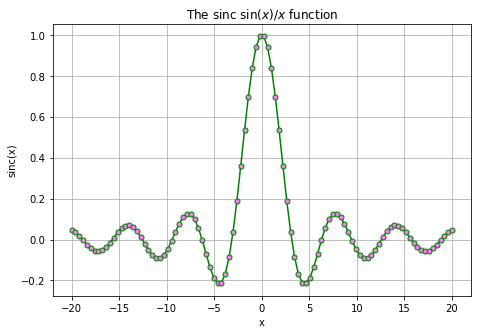

In [1]:
import numpy as np, matplotlib.pyplot as pl
"""Plot a green dashed sinc wave sin(x)/x"""
xg = np.linspace(-20,20,100)
yg = np.sin(xg)/xg

# make the plot
pl.plot(xg, yg, 'g-', marker='o', markersize=5, markerfacecolor='violet')
pl.gcf().set_size_inches(7.5,5)
pl.grid(True)
pl.title("The sinc ${\sin(x)}/{x}$ function")
pl.xlabel('x')
pl.ylabel('sinc(x)')

## Interference pattern for two synchronized point sources

Here is a 2D model of a room acoustics, where two point sound sources $S_1$ and $S_2$ play the musical note *C4* (with frequency of 262 Hz) in the middle of a square concert hall with a size of 30 m. The two sources are perfectly correlated, playing the same frequency and having the same phases. Spherical waves generated by the source $S_1$, placed at coordinates $(x_1, y_1)$ with respect to the center of the room is described by the function:

$$ u_1(x, y, t) = \sin(\frac{2\pi}{\lambda} |\vec r - \vec r_1| + 2\pi f t) = 
\sin\left( \frac{2\pi}{\lambda} \sqrt{ (x-x_1)^2 + (y-y_1)^2} + 2\pi f t \right)$$

where the wave length $\lambda = v_{\mbox{sound}}/f$. We know that the speed of sound in air is $v_{\mbox{sound}} = 343$ m/s. Similarly, the wave generated by source $S_2$ is:

$$ u_2(x, y, t) = \sin(\frac{2\pi}{\lambda} |\vec r - \vec r_2| + 2\pi f t) = 
\sin\left( \frac{2\pi}{\lambda} \sqrt{ (x-x_2)^2 + (y-y_2)^2} + 2\pi f t \right)$$

The superposition principle tells us that the resulting wave is the algebraic sum of the two waves:

$$u = u_1 + u_2$$

In [19]:
vS = 343
f_C4 = 262
λ = vS/f_C4
Nx = Ny = 500
L = 15
x = np.linspace(-L, L, Nx)
y = np.linspace(-L, L, Nx)
x_1, y_1 = -2.3, 0.0
x_2, y_2 = +2.3, 0.0
X, Y = np.meshgrid(x,y)
u_1 = np.sin(2*np.pi/λ*np.sqrt((X-x_1)**2 + (Y-y_1)**2))
u_2 = np.sin(2*np.pi/λ*np.sqrt((X-x_2)**2 + (Y-y_2)**2))
u_total = u_1 + u_2

The numpy function `meshgrid` it saves us a bunch of `for` loops, and makes the code more elegant, and faster at the same time. It works by taking two 1D grids, along the *x* and *y* directions, and creates two grids: one that repeats the vector *x* for all rows in the grid, and one that has vector *y* repeated identically for all columns. Using numpy magic the calculation is straight forward. Here is a very simple example that calculates $x*y$ for all points of a $3 \times 4$ grid. This is obtained at once with grid operation `X*Y`. Behind the scene, numpy is taking care of rolling all necessary `for` loops for us.

In [3]:
x = np.array((1,2,3,4))
y = np.array((-1,-2,-3))
X, Y = np.meshgrid(x,y)
print("X=\n",X,"\nY=\n",Y,"\n X*Y =\n", X*Y)

X=
 [[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]] 
Y=
 [[-1 -1 -1 -1]
 [-2 -2 -2 -2]
 [-3 -3 -3 -3]] 
 X*Y =
 [[ -1  -2  -3  -4]
 [ -2  -4  -6  -8]
 [ -3  -6  -9 -12]]


We use the function `imshow` to visualize a 2D density plot representing the amplitude of the wave at every point within the room using a color code. The figure is a little bit enlarged, labeled and a color bar legend is added. It is easy to see now that there are 14 directions along which the sound is enhanced (constructive interference) and 14 quiet directions (destructive interference).

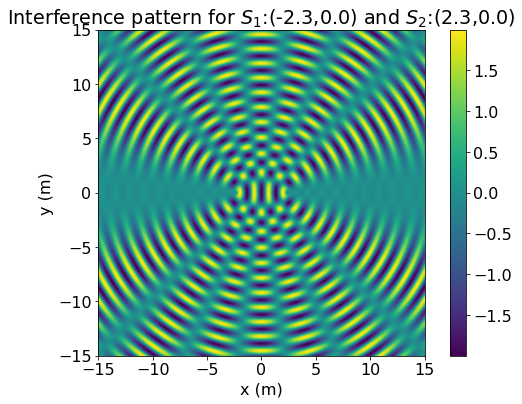

In [20]:
pl.imshow(u_total, extent=[-L, L, -L, L])
pl.gcf().set_size_inches(9,6)
pl.xlabel('x (m)')
pl.ylabel('y (m)')
pl.title(f"Interference pattern for $S_1$:({x_1},{y_1}) and $S_2$:({x_2},{y_2})")
pl.colorbar();

## 3D Plots

Although matplotlib has good facilities for making 3D plots, I prefer to use the library `k3d`, which is specialized in this kind of representation and offers some powerful features.

In [21]:
import k3d

We use library `k3d` to show the amplitude of the two waves interference as a 3D surface plot.

In [22]:
plot = k3d.plot()
plot += k3d.surface(1*u_total.astype(np.float32), 
                    color_map=k3d.basic_color_maps.CoolWarm,
                    bounds=[-L,L,-L,L], color=0xffdd00)
plot.display()

Output()

## Atomic orbitals

The electronic wave function for a quantum state of the hydrogen atom is labeled  by 3 quantum numbers:
the principal quantum number $n = 1,2,3,\ldots$, the angular momentum quantum number $\ell = 0,1,\ldots, n-1$ and the azimuthal quantum number $m = -\ell, -\ell+1, \ldots, \ell-1, \ell$ and, because of the spherical symmetry of the Coulomb force, can be written as a product of a radial part that depends only on the radial position of the electron, and an angular part that  depends on the direction of the electron position vector.

$$\Psi_{n,\ell, m}(x, y, z) = R_{n,\ell}(r) Y_{\ell, m}( \theta, \phi)$$
where the radial functions is
$$R_{n,\ell}(r) = \left( \frac{2r}{n a_0}\right)^\ell e^{-r/(n a_0)} L_{n-\ell -1}^{2\ell+1}
\left(\frac{2r}{n a_0}\right)$$
Here $L$ is a generalized Laguerre polynomial, and $Y_{\ell, m}$ is the spherical harmonic function that in turn has to do with the Legendre polynomials. All these special functions are defined in the `scipy` package.

Sometimes it is hard to visualize and understand the charge density inside the atom, since the wave function is fully 3D. The numpy `ogrid` function plays a similar role as the `meshgrid`, allowing us to write and calculate at once the wave function over a whole 3D grid, step-by-step like in the example below:

In [8]:
import k3d, math, numpy as np
import scipy.special, scipy.misc

r = lambda x,y,z: np.sqrt(x**2+y**2+z**2)
theta = lambda x,y,z: np.arccos(z/r(x,y,z))
phi = lambda x,y,z: np.arctan(y/x)

a0 = 1.
R = lambda r,n,l: (2*r/n/a0)**l * np.exp(-r/n/a0) *\
    scipy.special.genlaguerre(n-l-1,2*l+1)(2*r/n/a0)
WF = lambda r,theta,phi,n,l,m: R(r,n,l) * \
    scipy.special.sph_harm(m,l,phi,theta)
absWF = lambda r,theta,phi,n,l,m: abs(WF(r,theta,phi,n,l,m))**2
N=100j
a = 6.8
x,y,z = np.ogrid[-a:a:N,0:a:N/2,-a:a:N]
x = x.astype(np.float32)
y = y.astype(np.float32)
z = z.astype(np.float32)

Lets take for example the $(3,1,0)$ atomic state. This is a *p* state that has no angular momentum projection along the *z* axis. Calculation is done in atomic units. Other distance units may be used by changing the variable $a_0$.

In [9]:
orbital = absWF(r(x,y,z),theta(x,y,z),phi(x,y,z),2,1,0).astype(np.float32)

With the `k3d` plot we can represent the 3D surfaces that have equal density of probability. These iso-probability surfaces are calculated using an algorithm called `marching_cubes`. Here we plot 3 surfaces corresponding to densities of 0.1, 0.4, and 0.8 (normalized with respect to the maximum probability density). The electron in this state avoids the origin due to centrifugal forces and can be found with maximum probability at a distance of about 2 atomic units from the nucleus at (0,0,0). In this state, the electron is equally probable to be below or above $z=0$. These lobes of charge along the *x* axis are essential for understanding covalent bonds involving carbon atoms in a molecule.

In [23]:
plot = k3d.plot()
plot += k3d.marching_cubes(orbital/np.max(orbital), 
                           level=0.1, bounds=[-5,5,0,5,-5,5])
plot += k3d.marching_cubes(orbital/np.max(orbital), 
                           level=0.4, bounds=[-5,5,0,5,-5,5],color=0xFFFF00)
plot += k3d.marching_cubes(orbital/np.max(orbital), 
                           level=0.8, bounds=[-5,5,0,5,-5,5],color=0xFFaa00)
plot.display()

Output()

## Visualize the Electric Field

The electric field $\vec E$ at a point $\vec r$ created by a point charge $q_k$ placed at position $\vec r_k$ is given, according to Coulomb's law, by

$$ {\vec E_k} = q \frac{\vec r  - \vec r_0}{|\vec r  - \vec r_0|^3} $$

For a configuration with $N$ charges, the net electric  field at a give point is

$$ \vec E = \sum_{k=1}^N {\vec E}_k$$

In [25]:
def E_field(q, x0, y0, x, y):
    den = np.hypot(x - x0, y - y0)**3
    return q*(x-x0)/den, q*(y-y0)/den

# a grid in the x-y plane
nx, ny = 64, 64
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

Create a multipole configuration with `nq` charges of alternating sign, equally spaced on the unit circle.
Each charge is represented as a triplet $(q_k, x_k, y_k)$, and calculate the electric field components for these charges at the grid points by using the superposition principle:

In [26]:
nq = 2**3
charges = []
for i in range(nq):
    q = 2*(i%2)  - 1
    charges.append((q, np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq)))
    
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E_field(charge[0], charge[1], charge[2], X, Y)
    Ex += ex
    Ey += ey
color = 2 * np.log(np.hypot(Ex, Ey))

Here the `E_field` function acts on the whole grid arrays `X` and `Y` by the magic of numpy, returning corresponding arrays. The strength of the field is calculated in the array `color`, which will used later to color code the field lines.

To show the field lines we use `streamplot()` and add solid circles with alternating colors on top, at corresponding positions to represent charges. 

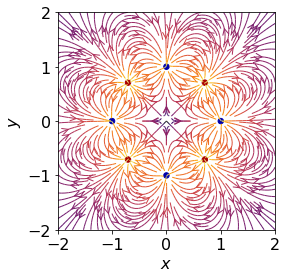

In [27]:
pl.streamplot(x, y, Ex, Ey, 
              color=color, linewidth=1, cmap=pl.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

charge_color = lambda q: "#aa0000" if q >0 else "#0000aa"
ax = pl.gca()
from matplotlib.patches import Circle

# Add filled circles for the charges themselves
for q in charges:
    ax.add_artist(Circle((q[1], q[2]), 0.05, color=charge_color(q[0])))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')

In the next example we create two rows of `nq` charges each with opposite sign, separate by a distance `d`, to represent the electric field for a charged parallel plate capacitor. 

In [28]:
nx, ny = 64, 64
x = np.linspace(-5, 5, nx)
y = np.linspace(-5, 5, ny)
X, Y = np.meshgrid(x, y)

Calculate the electric field for each charge and the total electric field at the grid positions. The `color` array is used to code the strength of the electric field.

In [29]:
nq, d = 20, 2
charges = []
for i in range(nq):
    charges.append(( 1, 2*(i/(nq-1)*2-1), -d/2))
    charges.append((-1, 2*(i/(nq-1)*2-1),  d/2))

Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E_field(charge[0], charge[1], charge[2], X, Y)
    Ex += ex
    Ey += ey
color = np.log(np.sqrt(Ex**2 + Ey**2))

We use `streamplot()` to show electric field lines, and add colored disks to represent charge position. Figure is display in the notebook and also saved on disk as a '.png' file.

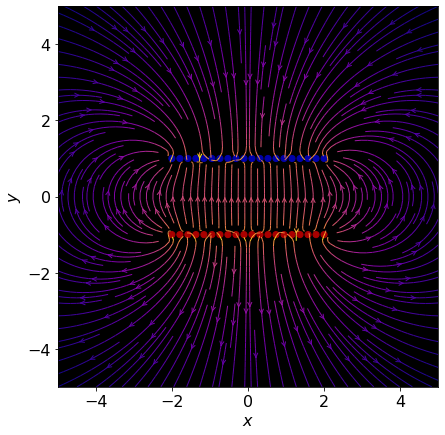

In [30]:
pl.streamplot(x, y, Ex, Ey, color=color, 
              linewidth=1, cmap=pl.cm.plasma,
              density=2, arrowstyle='->')

ax = pl.gca()
# Add filled circles for the charges themselves
for q in charges:
    ax.add_artist(Circle((q[1], q[2]), 0.08, color=charge_color(q[0])))
    
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_aspect('equal')
pl.gcf().set_size_inches(7,7)
ax.set_facecolor('k')
pl.savefig('capacitor.png', dpi=100)

## Plotting error experimental data with error bars and residuals

Pretty often we want to plot some experimental data with error bars, and sometimes we also want to plot a theoretical model that might describe the data on the same plot. It's often good to separately plot the residuals, which are the differences between the data and the model. Here, let's see how to make these plots, using some made-up data.

The file "peak_data.txt" contains some made-up data with uncertainties. We can look at a text file like this using text editor like Notepad (Windows) or TextEdit (macOS, set to Format/Plain Text), or natively in Jupyterlab. 

Opening "peak_data.txt" with a text editor we see that the first few lines are:

| x (cm) |   y (nW) |      yerr |
|--------|----------|-----------|
|0.00000 |  0.587263| 0.0883186 |
|0.50000 |  0.382128| 0.0394351 |
|1.00000 |  0.826145|  0.204373 |

Numpy has good facilities for saving and loading data in various formats, from disk, or even from a remote website.
The function `np.loadtxt()` can be used to read a file like this into a 2D array. We need to use the option `skiprows=1` to skip the header line, which is not part of the data. Here is a complete program to read this data and plot it as points with error bars:

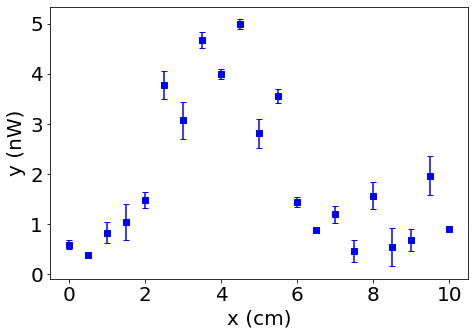

In [47]:
# Read the data from file:
data = np.loadtxt('peak_data.txt', float, skiprows=1) # read into 2D array
x = data[:,0]
y = data[:,1]
yerr = data[:,2]  # slice into three 1D arrays

# Plot the data with error bars:
pl.figure(figsize=(7.5,5))
pl.rc('font', size=20)
pl.errorbar(x,y,yerr,fmt='bs',capsize=3) # plot the data
pl.xlabel('x (cm)')
pl.ylabel('y (nW)');

The new thing here is `plt.errorbar(x,y,yerr...)` which is used to plot the data instead of `plt.plot()`. Here `yerr` is a third array which gives the *y* error bars for each point (it is also possible to plot x error bars). The options we have used are `fmt='bo'` which is the usual string to specify "blue dots" and `capsize=5` giving the widths of caps at the top and bottom of the error bars. Matplotlib maintains a database of default style and configuration parameters named `rcParameters` that is loaded when starting to use the library and modified dynamically, like in this case to increase uniformly the size of all fonts used to label the graph.

Looking at this graph, this data seems to be modeled by a bell shaped curve, but since the data clearly don't go down to zero at the ends, there must be also a floor, or background for the model. We can try to model is with:

$$f(x) = A + B e^{-(x-x_0)^2/2 w^2}$$

Just by visual inspection, a reasonable estimate for the parameters could be $A = 1.0$, $B = 4.0$, $x_0 = 4.0$, and $w = 1.0$. Is this a good model? This can be answered by ploting the data and model together, and also plotting the residuals, which are the differences between the model and the data.

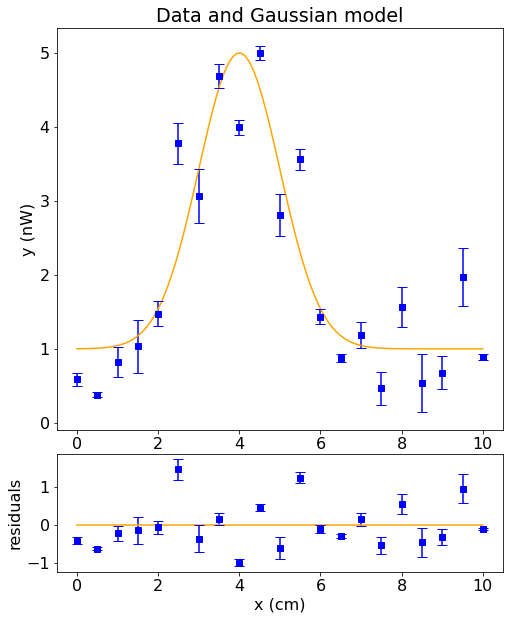

In [48]:
## a quick way to obtain a function
## def would also work, but wastes a line

f = lambda x: A + B*np.exp(-(x-x0)**2/(2*w**2))

## estimated paramaters for the model
A, B, x0, w = 1.0, 4.0, 4.0, 1.0

xmod = np.linspace(0,10,100)

pl.rc('font', size=16)
fig = pl.gcf()
fig.set_size_inches(8, 10.)
gs = fig.add_gridspec(4,1)

ax1 = fig.add_subplot(gs[0:3, 0:1])
ax1.plot(xmod, f(xmod), 'orange')
ax1.errorbar(x,y,yerr,fmt='bs',capsize=5)
pl.ylabel('y (nW)')
pl.title('Data and Gaussian model')

ax2 = fig.add_subplot(gs[3:4, 0:1])
yzero = np.zeros(xmod.size)
ax2.plot(xmod, yzero, 'orange')
ax2.errorbar(x, y-f(x), yerr, fmt='bs', capsize=5)
pl.xlabel('x (cm)')
pl.ylabel('residuals');

Function `gcf()` gets the current figure object. In this figure, subplots are organized in 4 rows and 1 column. The first subplot called `ax1` spans the top 3 rows, while we want the subplot `ax2` to by shorter, spanning the bottom row.

>**Warning**\
In Matplotlib the concepts of `Axes` and `Axis` are quite different and, at the beginning, it can be confusing. `Axis` is the horizontal or vertical line that gets ticks and tick labels. These, together with the points that represent data and labeling, forms a **plot**, or an `Axes` object. A `Figure` is a rectangular region of paper that gets the ink and can contain one or more `Axes` objects. This point is illustrated below.\
![Figure-Axes-Axis](matplotlib.png)


The quality of the model is judged by looking at scattering of the residuals above and below zero. Excellent agreement would show random scattering with no obvious systematic variation in *x*, which is not the case here. The model can be further tuned by using the method of **least-squares fitting**. Details later on.

Further topics to explore: animation, image processing, virtual reality, augmented reality, computer vision, ray tracing.

**Programming Assignment**\
Use the code explained in class to visualize the electric field created by a semi-circular capacitor, that has half of a circle uniformly charged with positive charge, and the other half with negative charge. This situation can be simulated by using discrete charges placed in a circular pattern. Choose, for example, 10 positive unit charges equally spaced on half of the circle, and 10 negative charges on the other half. What is the magnitude and direction of the electric field at the origin, if the circle has a radius of 1 cm, and charges have the magnitude of $1.0 \mu$C. To answer this question: (1) find the grid point closest to the origin and the corresponding electric field, and (2) convert the result from simulation units to physical units.

Show all work in a jupyter notebook.

---------
### End-of-class Computational Physics Project

Due March 15, 2021
- Title
- Relevance
- Anticipated outcomes
- Needs to involve Python programming

Due April 15, 2021
- 5~10 pages of Report, preferably as a Jupyter notebook.

======================================================